Анастасия Плавина

## Тема: Логистическая регрессия. Метрики оценки качества модели.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [3]:
def calc_logloss(y, y_pred):
    """
    Расчет логарифмической функции потерь
    
    y: истинные значения таргета
    y-pred: предсказанные значения таргета
    
    returns: значение log-loss
    
    """
    y_pred = y_pred.copy()
    y_pred = np.clip(y_pred, a_min=1e-4, a_max=1-1e-4)
    
    logloss = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    
    return logloss

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [4]:
def scaler(X):
    """
    Масштабирование данных
    
    X: матрица признаков
    
    returns: масштабированная матрица признаков
    
    """
    
    X_scaled = X[1:,].copy()
    
    # расчет среднего и отклонения для каждого признака
    X_mean, X_std = X_scaled.mean(axis=1), X_scaled.std(axis=1)
    X_mean, X_std = X_mean.reshape(X_scaled.shape[0], 1), X_std.reshape(X_scaled.shape[0], 1)

    # стандартизация
    X_scaled = (X_scaled - X_mean) / X_std
    
    # приведение к виду с единицами
    X_scaled = np.vstack((np.ones(X_scaled.shape[1]), X_scaled))
    
    return X_scaled

In [5]:
def sigmoid(z):
    """
    Вычисление вероятности принадлежности к классу
    
    z: матрица признаков с весами
    
    returns: вероятность принадлежности к классу
    
    """

    res = 1 / (1 + np.exp(-z))
    return res

In [6]:
X = scaler(X)

In [7]:
def eval_model(X, y, iterations, alpha, with_weights=False):
    """
    Реализация градиентного спуска с подсчетом логарифмической функции потерь
    
    X: матрица признаков
    y: истинные значения таргета
    with_weights: возвращает массив весов
    
    returns: массив ошибок 
    если задан параметр with_weights: массив ошибок и массив весов

    """
    
    np.random.seed(42)
    n = X.shape[1]
    W = np.random.randn(X.shape[0])
    errors = []
    weights = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)) 
        
        weights.append(W)
        errors.append(err)
        
    
    if with_weights:
        return weights

    return errors

In [8]:
def visualization(errors, alpha, iterations):
    """
    Визуализация сходимости функции ошибок модели
    
    errors: массив ошибок
    alpha: скорость обучения
    iterations: кол-во итераций
    
    returns: график функции ошибок
    
    """
    plt.plot(range(len(errors)), errors, c='r')
    plt.title(f'Log-loss at {iterations} iterations and alpha {alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Log-loss')
    plt.grid()
    plt.show()

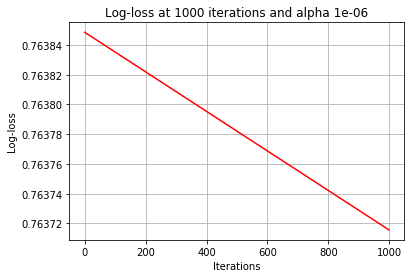

Минимальная ошибка: 0.7637
------------------------------------------------


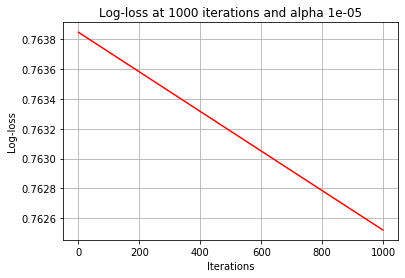

Минимальная ошибка: 0.7625
------------------------------------------------


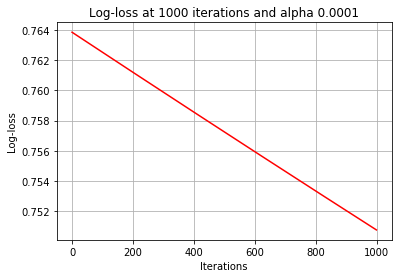

Минимальная ошибка: 0.7508
------------------------------------------------


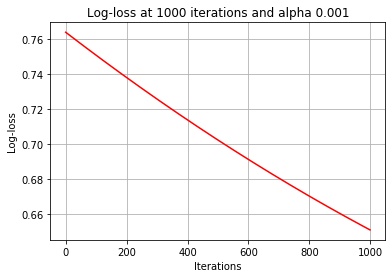

Минимальная ошибка: 0.6512
------------------------------------------------


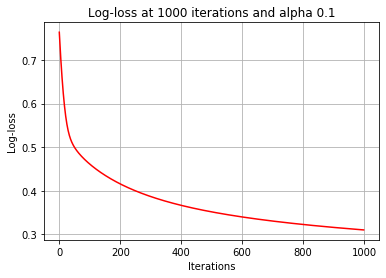

Минимальная ошибка: 0.3101
------------------------------------------------


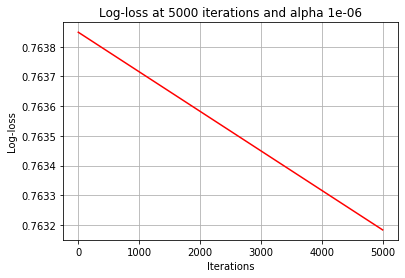

Минимальная ошибка: 0.7632
------------------------------------------------


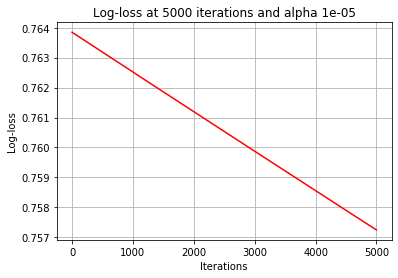

Минимальная ошибка: 0.7572
------------------------------------------------


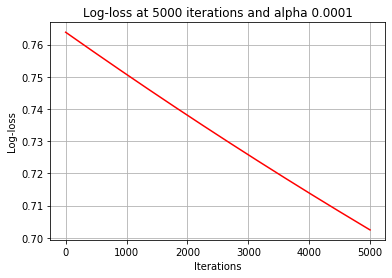

Минимальная ошибка: 0.7024
------------------------------------------------


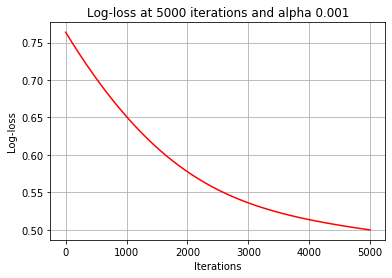

Минимальная ошибка: 0.4998
------------------------------------------------


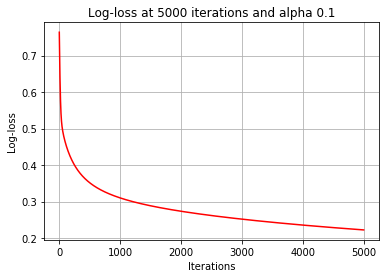

Минимальная ошибка: 0.2224
------------------------------------------------


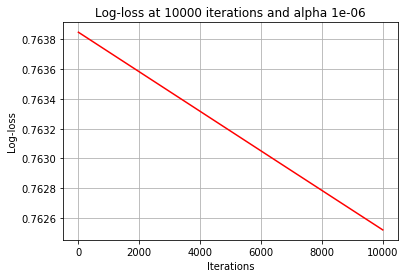

Минимальная ошибка: 0.7625
------------------------------------------------


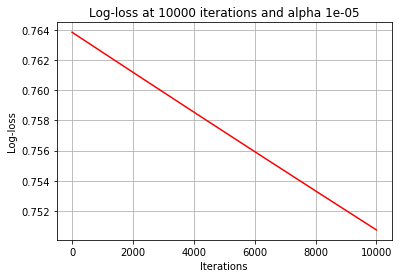

Минимальная ошибка: 0.7507
------------------------------------------------


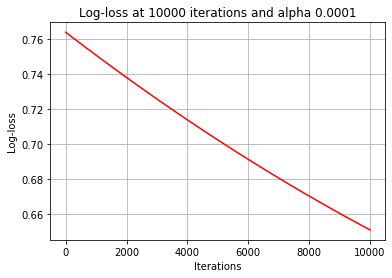

Минимальная ошибка: 0.6511
------------------------------------------------


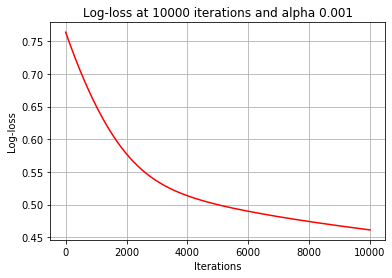

Минимальная ошибка: 0.4612
------------------------------------------------


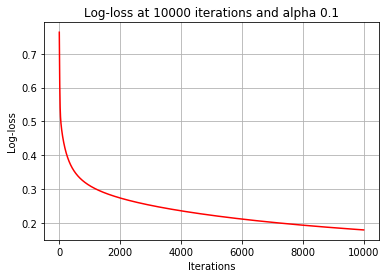

Минимальная ошибка: 0.1792
------------------------------------------------


In [9]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.1]
iterations = [1000, 5000, 10000]

for iter_num in iterations:
    for alpha in alphas:
        errors = eval_model(X, y, iter_num, alpha)
        visualization(errors, alpha, iter_num)
        
        print(f'Минимальная ошибка: {round(errors[-1], 4)}')
        print('------------------------------------------------')

Минимальное значение logloss достигается при alpha = 0.1 за 10 000 итераций. Т.к. отличие ошибки на 5000 итераций и 10000 итераций не значительно, оптимальными считаем параметры alpha = 0.1 и iterations = 5000 

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [10]:
weights = eval_model(X, y, 5000, 0.1, with_weights=True)[1]

In [11]:
def calc_pred_proba(X, W, threshold=0.6):
    """
    Подсчет вероятностей принадлежности к классу 1
    
    X: матрица признаков
    W: оптимизированные веса 
    threshold: пороговое значение, согласно которому объекты разделяются на классы
    
    returns: массив вероятностей принадлежности объекта к классу 1 class_1_proba
    
    """
    
    class_1_proba = []
    class_0_proba = []
    
    z = np.dot(W, X)
    y_pred = sigmoid(z)

    for proba in y_pred:
        if proba >= threshold:  
            class_1_proba.append(proba)
            
    return class_1_proba

In [12]:
calc_pred_proba(X, weights)

[0.9995770794839859, 0.7415013267531612, 0.9999229609782154, 0.997415339802936]

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [13]:
def calc_pred(X, W, threshold=0.6):
    """
    Определение принадлежности к классу
    
    X: матрица признаков
    W: оптимизированные веса 
    threshold: пороговое значение, согласно которому объекты разделяются на классы
    
    returns: массив соответствующих классов y_pred_class
    """
    y_pred_class = []
    
    z = np.dot(W, X)
    y_pred = sigmoid(z)

    for proba in y_pred:
        if proba >= threshold:  
            y_pred_class.append(1)
        else: 
            y_pred_class.append(0)
            
    return y_pred_class

In [14]:
calc_pred(X, weights)

[0, 0, 1, 0, 1, 0, 1, 0, 0, 1]

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [15]:
def confusion_matrix(y, y_pred):
    
    """
    Составление матрицы ошибок модели
    
    y: истинные значения таргета
    y-pred: предсказанные значения таргета
    
    """
    matrix = np.zeros(shape=(2, 2))
    
    # True Positive
    matrix[0, 0] = np.sum(np.where(y == 1, y_pred == y, False))
    
    # True Negative    
    matrix[1, 1] = np.sum(np.where(y == 0, y_pred == y, False))
    
    # False Positive 
    matrix[0, 1] = np.sum(np.where(y == 1, y_pred != y, False))
    
    # False Negative 
    matrix[1, 0] = np.sum(np.where(y == 0, y_pred != y, False))

                          
    return matrix

In [16]:
def accuracy(y, y_pred): 
    """
    Вычисление метрики accuracy
    
    y: истинные значения таргета
    y-pred: предсказанные значения таргета
    
    
    """
    return (y == y_pred).sum() / len(y)

In [17]:
def precision(y, y_pred):
    """
    Вычисление метрики precision
    
    y: истинные значения таргета
    y-pred: предсказанные значения таргета
    
    
    """
    matrix = confusion_matrix(y, y_pred)
    
    return matrix[0, 0] / (matrix[0, 0] + matrix[1, 1])

In [18]:
def recall(y, y_pred):
    """
    Вычисление метрики recall
    
    y: истинные значения таргета
    y-pred: предсказанные значения таргета
    
    """
        
    matrix = confusion_matrix(y, y_pred)
    
    return matrix[0, 0] / (matrix[0, 0] + matrix[1, 0])

In [19]:
def F_score(y, y_pred):
    """
    Вычисление F-метрики
    
    y: истинные значения таргета
    y-pred: предсказанные значения таргета
    
    """
    
    return 2 * precision(y, y_pred) * recall(y, y_pred) / (precision(y, y_pred) + recall(y, y_pred))

In [20]:
y_pred = calc_pred(X, weights)

In [21]:
print('Model evaluation')
print('--------------------')
print(f'Accuracy:\t{accuracy(y, y_pred)}')
print(f'Precision:\t{round(precision(y, y_pred), 2)}')
print(f'Recall:\t\t{round(recall(y, y_pred), 2)}')
print(f'F-score:\t{round(F_score(y, y_pred), 2)}')

print(f'Сonfusion_matrix:\n{confusion_matrix(y, y_pred)}')

Model evaluation
--------------------
Accuracy:	0.9
Precision:	0.44
Recall:		1.0
F-score:	0.62
Сonfusion_matrix:
[[4. 1.]
 [0. 5.]]


6. Могла ли модель переобучиться? Почему?

Модель могла переобучиться, т.к. в датасете мало объектов и не применена регуляризация.